# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [14]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [16]:
df = pd.read_csv('previsao_de_renda.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

In [19]:
df['log_renda'] = np.log(df['renda'])

# Usando o Patsy para criar dummies para variáveis qualitativas
formula = '''log_renda ~ C(sexo, Treatment(0))
                        + C(posse_de_veiculo, Treatment(0))
                        + C(posse_de_imovel, Treatment(0))
                        + qtd_filhos
                        + C(tipo_renda, Treatment(1))
                        + C(educacao, Treatment(1))
                        + C(estado_civil, Treatment(1))
                        + C(tipo_residencia, Treatment(1))
                        + idade
                        + tempo_emprego
                        + qt_pessoas_residencia'''

# Ajustando o modelo
model_initial = smf.ols(formula, data=df).fit()

model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:28:31   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.1950      0.304     23.660      0.000       6.599       7.791
C(sexo, Treatment(0))[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
C(posse_de_veiculo, Treatment(0))[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
C(posse_de_imovel, Treatment(0))[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
C(tipo_renda, Treatment(1))[T.Assalariado]           -0.2209      0.241     -0.916      0.360      -0.694       0.252
C(tipo_renda, Treatment(1))[T.Empresário]            -0.0657      0.241     -0.272      0.785      -0.539       0.407
C(tipo_renda, Treatment(1))[T.Pensionista]           -0.5296      0.341     -1.553      0.120      -1.198       0.139
C(tipo_renda, Treatment(1))[T.Servidor público]      -0.1633      0.242     -0.675      0.500      -0.637       0.311
C(educacao, Treatment(1))[T.Primário]                -0.1071      0.159     -0.673      0.501      -0.419       0.205
C(educacao, Treatment(1))[T.Secundário]              -0.1212      0.142     -0.853      0.394      -0.400       0.157
C(educacao, Treatment(1))[T.Superior completo]       -0.0133      0.142     -0.093      0.926      -0.292       0.265
C(educacao, Treatment(1))[T.Superior incompleto]     -0.1502      0.145     -1.035      0.301      -0.435       0.134
C(estado_civil, Treatment(1))[T.Casado]              -0.3265      0.111     -2.935      0.003      -0.545      -0.108
C(estado_civil, Treatment(1))[T.Solteiro]            -0.0593      0.033     -1.809      0.071      -0.124       0.005
C(estado_civil, Treatment(1))[T.União]               -0.3607      0.113     -3.182      0.001      -0.583      -0.138
C(estado_civil, Treatment(1))[T.Viúvo]                0.0424      0.048      0.875      0.382      -0.053       0.137
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0442      0.054      0.815      0.415      -0.062       0.150
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0184      0.029      0.625      0.532      -0.039       0.076
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.0754      0.091     -0.829      0.407      -0.254       0.103
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.1107      0.084      1.319      0.187      -0.054       0.275
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0129      0.039     -0.331      0.741      -0.089       0.064
qtd_filhos                                           -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                                 0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego  

- Intercept (Intercepto): O coeficiente para o intercepto é 7.1950, o que indica o valor esperado de log(renda) quando todas as variáveis independentes são zero. Isso pode não ter um significado prático direto, pois muitas das variáveis independentes não podem ser zero na realidade, como idade e tempo de emprego.
- P-values: Os p-values associados a cada coeficiente indicam a significância estatística do efeito da variável na log(renda). Por exemplo, um p-value abaixo de 0.05 geralmente indica uma significância estatística. No entanto, é importante considerar o contexto do problema e não se basear apenas nos p-values para avaliar a relevância prática das variáveis.
- Variáveis Dummy (Categorias Qualitativas): Os coeficientes para as variáveis dummy indicam o efeito dessas categorias em relação à casela de referência. Por exemplo, para a variável sexo, o coeficiente para 'M' é 0.7874. Isso sugere que, em média, os clientes do sexo masculino têm um log(renda) maior do que os do sexo feminino, mantendo todas as outras variáveis constantes.

os coeficientes e p-values fornecem informações sobre o efeito e a significância estatística das variáveis no modelo. No entanto, é importante considerar o contexto específico do problema e a interpretação prática dos coeficientes para determinar se o modelo faz sentido em termos práticos para prever a renda dos clientes.

- Com base nesses p-values, a variável menos significante a ser removida seria a "tipo de renda" devido aos coeficientes associados a todas as categorias não serem significativos (p > 0.05). Vamos ajustar o modelo sem essa variável e analisar os resultados:

In [24]:
formula_updated = '''log_renda ~ C(sexo, Treatment(0))
                                    + C(posse_de_veiculo, Treatment(0))
                                    + C(posse_de_imovel, Treatment(0))
                                    + qtd_filhos
                                    + C(educacao, Treatment(1))
                                    + C(estado_civil, Treatment(1))
                                    + C(tipo_residencia, Treatment(1))
                                    + idade
                                    + tempo_emprego
                                    + qt_pessoas_residencia'''

# Ajustando o modelo atualizado
model_updated = smf.ols(formula_updated, data=df).fit()

# Exibindo o resumo do modelo atualizado
model_updated.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     336.5
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:36:42   Log-Likelihood:                -13623.
No. Observations:               12427   AIC:                         2.729e+04
Df Residuals:                   12406   BIC:                         2.744e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.0872      0.185     38.376      0.000       6.725       7.449
C(sexo, Treatment(0))[T.M]                            0.7790      0.015     53.021      0.000       0.750       0.808
C(posse_de_veiculo, Treatment(0))[T.True]             0.0459      0.014      3.232      0.001       0.018       0.074
C(posse_de_imovel, Treatment(0))[T.True]              0.0839      0.014      5.975      0.000       0.056       0.111
C(educacao, Treatment(1))[T.Primário]                -0.1560      0.160     -0.978      0.328      -0.469       0.157
C(educacao, Treatment(1))[T.Secundário]              -0.1559      0.143     -1.092      0.275      -0.436       0.124
C(educacao, Treatment(1))[T.Superior completo]       -0.0349      0.143     -0.245      0.807      -0.315       0.245
C(educacao, Treatment(1))[T.Superior incompleto]     -0.1747      0.146     -1.198      0.231      -0.460       0.111
C(estado_civil, Treatment(1))[T.Casado]              -0.3141      0.112     -2.812      0.005      -0.533      -0.095
C(estado_civil, Treatment(1))[T.Solteiro]            -0.0555      0.033     -1.686      0.092      -0.120       0.009
C(estado_civil, Treatment(1))[T.União]               -0.3403      0.114     -2.989      0.003      -0.563      -0.117
C(estado_civil, Treatment(1))[T.Viúvo]                0.0304      0.049      0.625      0.532      -0.065       0.126
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0440      0.054      0.810      0.418      -0.063       0.151
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0062      0.030      0.210      0.834      -0.052       0.064
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.0990      0.091     -1.084      0.278      -0.278       0.080
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.1354      0.084      1.608      0.108      -0.030       0.300
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0112      0.039     -0.286      0.775      -0.088       0.066
qtd_filhos                                           -0.2559      0.108     -2.361      0.018      -0.468      -0.043
idade                                                 0.0051      0.001      6.347      0.000       0.004       0.007
tempo_emprego                                         0.0609      0.001     59.087      0.000       0.059       0.063
qt_pessoas_residencia                                 0.2782      0.108      2.571      0.010       0.066       0.490
==============================================================================
Omnibus:                        0.972   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                0.966
Skew:         

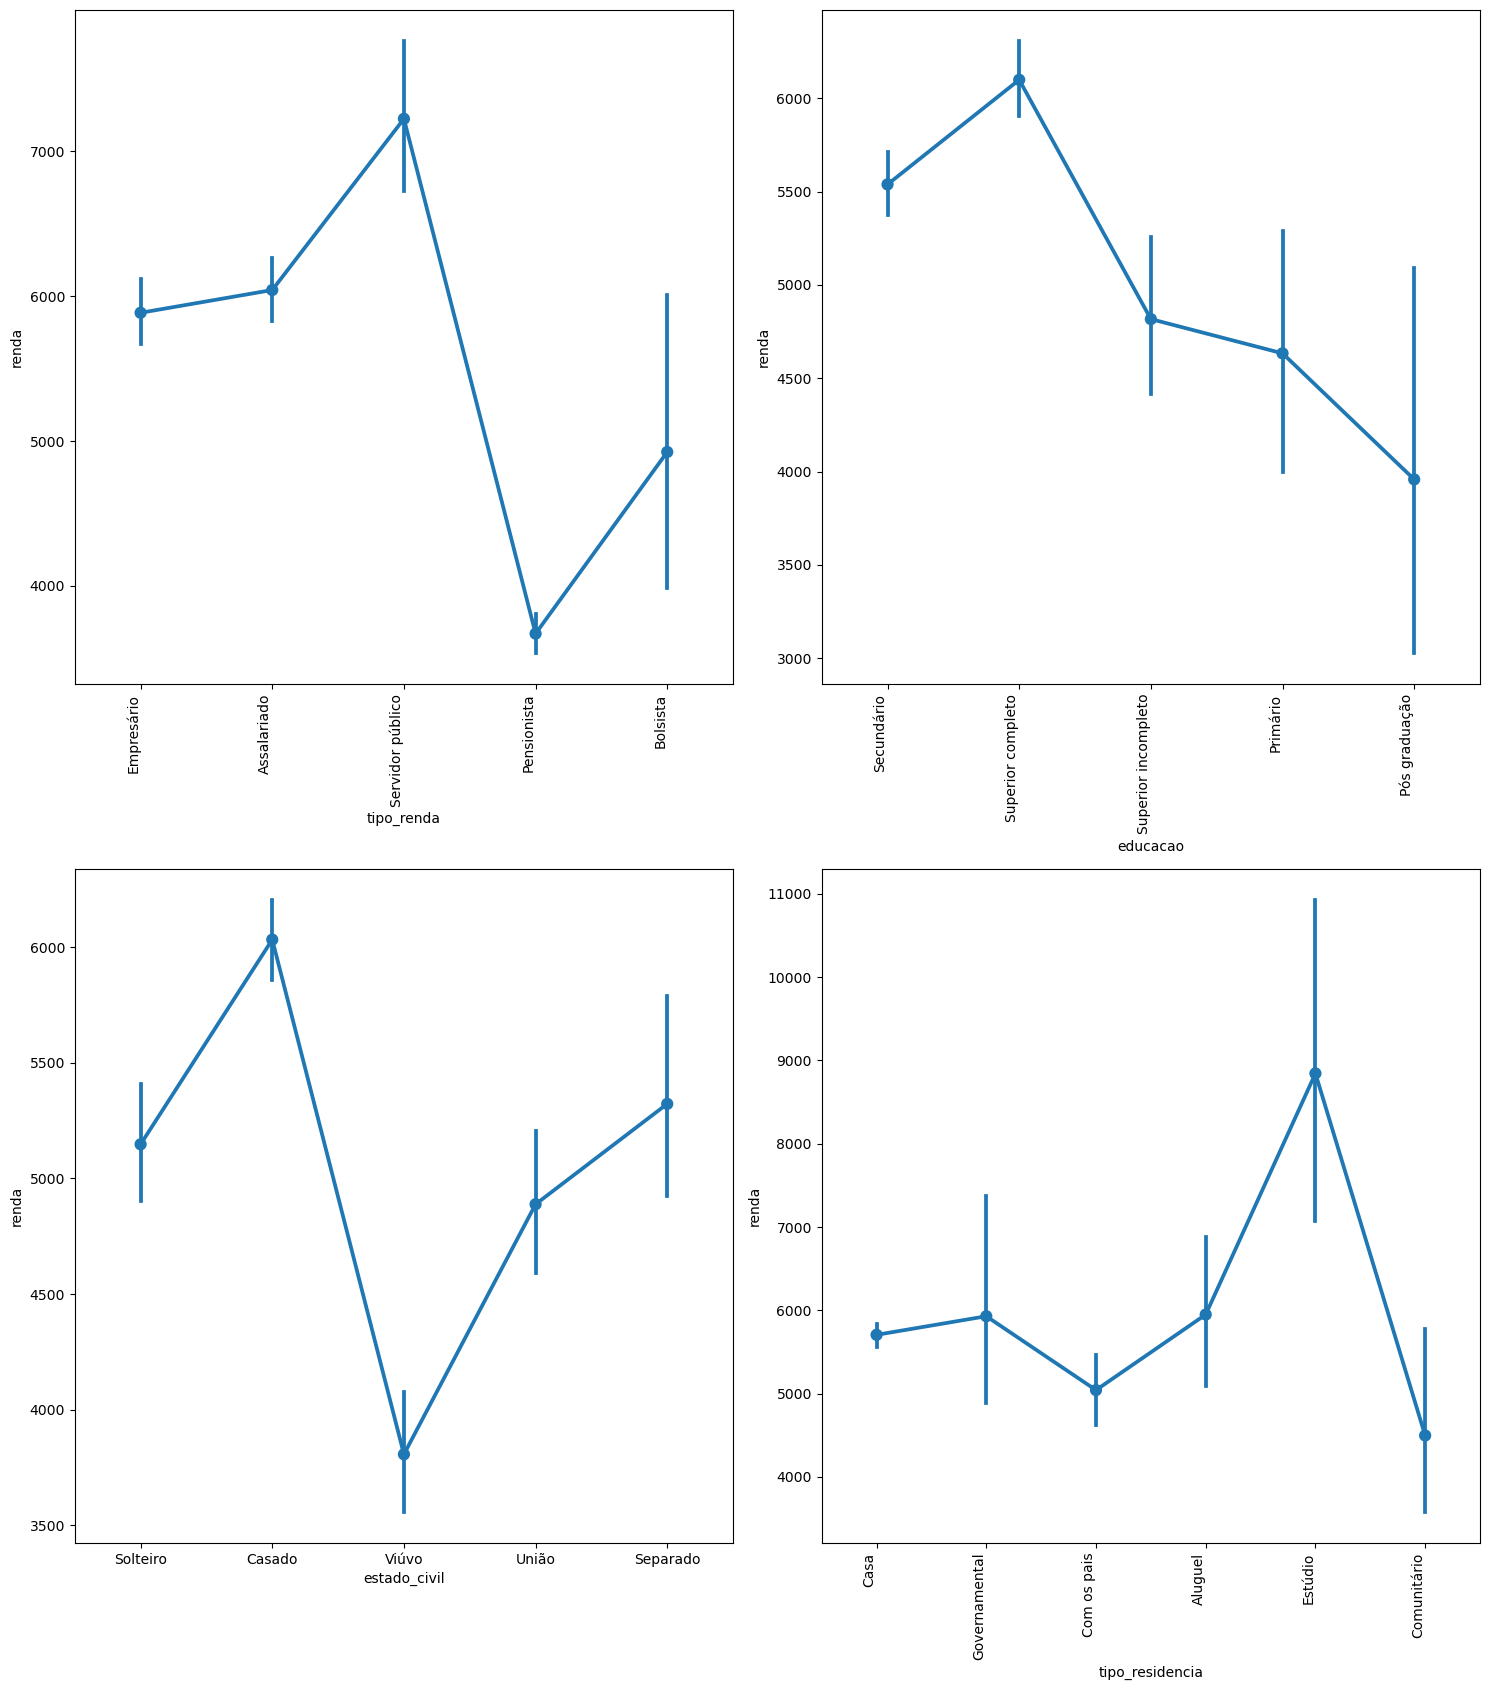

In [29]:
plt.close('all')

plt.rc('figure', figsize=(15, 17))
fig, axes = plt.subplots(2, 2)

tipo_renda = sns.pointplot(ax=axes[0, 0], y='renda', x='tipo_renda', data=df)
educacao = sns.pointplot(ax=axes[0, 1], y='renda', x='educacao', data=df)
sns.pointplot(ax=axes[1, 0], y='renda', x='estado_civil', data=df)
tipo_residencia = sns.pointplot(ax=axes[1, 1], y='renda', x='tipo_residencia', data=df)

tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
educacao.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.tight_layout()
plt.show()

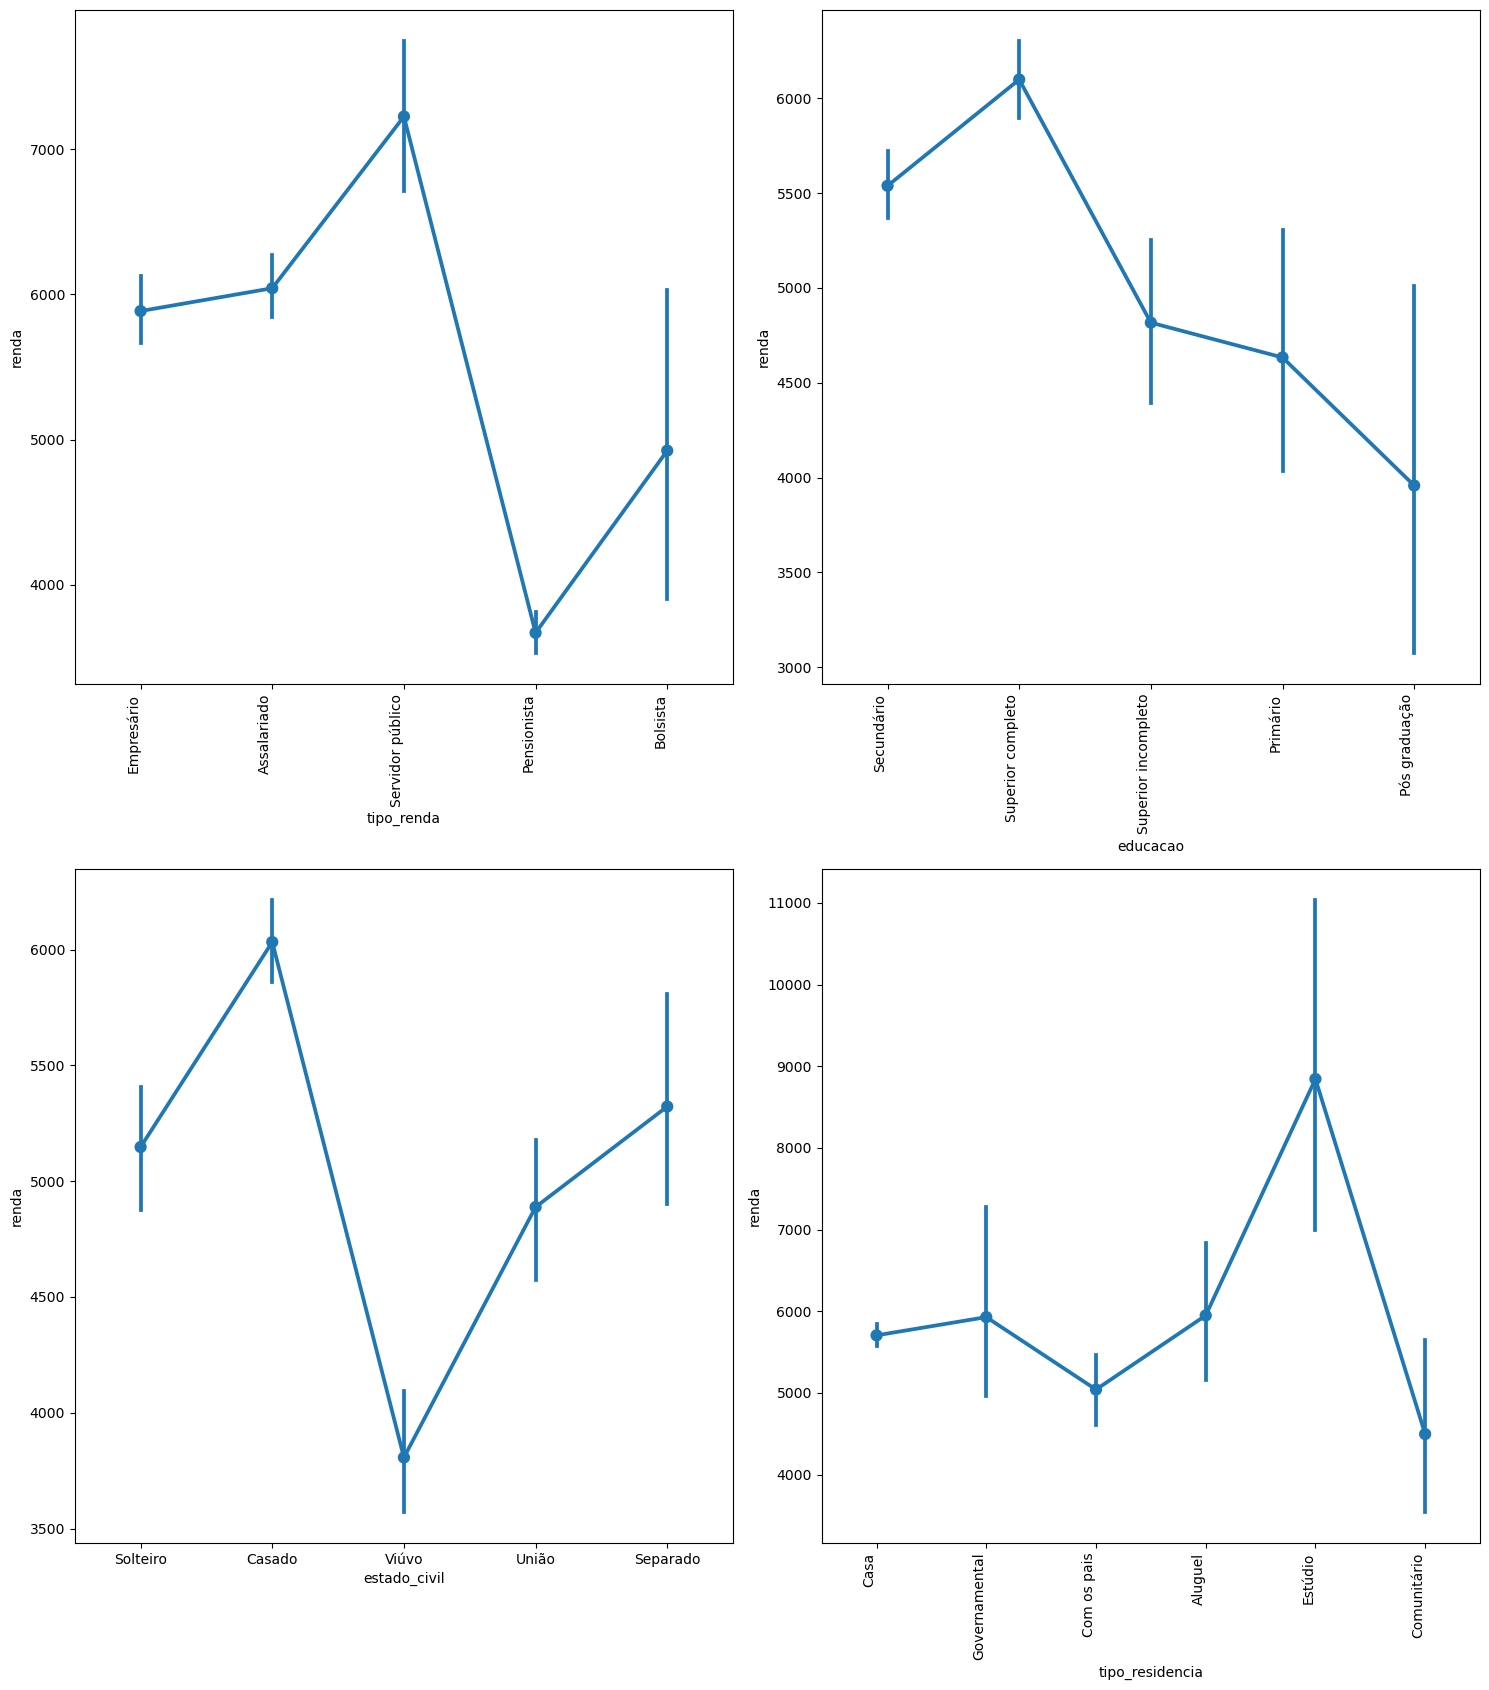

In [30]:
plt.close('all')

plt.rc('figure', figsize=(15, 17))
fig, axes = plt.subplots(2, 2)

tipo_renda = sns.pointplot(ax=axes[0, 0], y='renda', x='tipo_renda', data=df)
educação = sns.pointplot(ax=axes[0, 1], y='renda', x='educacao', data=df)
sns.pointplot(ax=axes[1, 0], y='renda', x='estado_civil', data=df)
tipo_residencia = sns.pointplot(ax=axes[1, 1], y='renda', x='tipo_residencia', data=df)

tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.tight_layout()
plt.show()

- R-quadrado (R-squared): O valor do R-quadrado indica a proporção da variabilidade da variável dependente (log(renda)) que é explicada pelas variáveis independentes no modelo. No novo modelo, o R-quadrado é de 0.352, o que significa que aproximadamente 35.2% da variabilidade da log(renda) é explicada pelas variáveis incluídas no modelo.

- F-Statistic: O valor do F-statistic é usado para testar a significância geral do modelo. Quanto maior o F-statistic, mais significativo é o modelo em termos de explicar a variabilidade na variável dependente. No novo modelo, o F-statistic é de 336.5, indicando que o modelo como um todo é estatisticamente significativo.

- Coeficientes: Os coeficientes estimados para as variáveis no novo modelo mostram a magnitude e a direção do efeito das variáveis independentes na log(renda). Por exemplo, o coeficiente para a idade é 0.0051, o que significa que, mantendo todas as outras variáveis constantes, um aumento de uma unidade na idade está associado a um aumento de aproximadamente 0.0051 na log(renda).

- P-values: Os valores P fornecem informações sobre a significância estatística de cada coeficiente. Um valor P menor que 0.05 geralmente é considerado estatisticamente significativo. No novo modelo, algumas variáveis têm valores P maiores que 0.05, o que indica que essas variáveis podem não ser estatisticamente significativas para prever a log(renda).

Comparando com o modelo anterior, o R-quadrado e o F-statistic são ligeiramente menores no novo modelo.